In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PATH = '/content/drive/MyDrive/Pywork/rec_books'

In [4]:
df = pd.read_csv(PATH+'/train.csv')
df.head(3)

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books


## 1. User-ID

In [5]:
print(f"A number of Users : {df['User-ID'].nunique()}")

A number of Users : 83256


In [6]:
df['User-ID'].value_counts().sort_values(ascending=False).head(10)

USER_56601    11143
USER_54845     6456
USER_52453     5814
USER_73501     4290
USER_03411     3453
USER_17715     3429
USER_06837     3329
USER_33706     2971
USER_64601     2943
USER_72452     2857
Name: User-ID, dtype: int64

In [7]:
df['User-ID'].value_counts().describe()

count    83256.000000
mean        10.466429
std         83.323024
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max      11143.000000
Name: User-ID, dtype: float64

In [8]:
df['User-ID'].value_counts().sort_values(ascending=False)

USER_56601    11143
USER_54845     6456
USER_52453     5814
USER_73501     4290
USER_03411     3453
              ...  
USER_83629        1
USER_83628        1
USER_69242        1
USER_69243        1
USER_92100        1
Name: User-ID, Length: 83256, dtype: int64

In [10]:
reviewerstats = df['User-ID'].value_counts().sort_values(ascending=True)

for i in range(1,10):
    print(f"The ratio of reviewers evaluating more than {i} :\
 {round(reviewerstats.loc[reviewerstats>=i].count()/df['User-ID'].nunique()*100,2)}% /\
 {reviewerstats.loc[reviewerstats>=i].count()}")
for i in range(10,100,10):
    print(f"The ratio of reviewers evaluating more than {i} :\
 {round(reviewerstats.loc[reviewerstats>=i].count()/df['User-ID'].nunique()*100,3)}% /\
 {reviewerstats.loc[reviewerstats>=i].count()}")
for i in range(100,1001,100):
    print(f"The ratio of reviewers evaluating more than {i} :\
 {round(reviewerstats.loc[reviewerstats>=i].count()/df['User-ID'].nunique()*100,4)}% /\
 {reviewerstats.loc[reviewerstats>=i].count()}")

The ratio of reviewers evaluating more than 1 : 100.0% / 83256
The ratio of reviewers evaluating more than 2 : 44.43% / 36988
The ratio of reviewers evaluating more than 3 : 32.27% / 26870
The ratio of reviewers evaluating more than 4 : 25.75% / 21441
The ratio of reviewers evaluating more than 5 : 21.57% / 17958
The ratio of reviewers evaluating more than 6 : 18.71% / 15574
The ratio of reviewers evaluating more than 7 : 16.54% / 13774
The ratio of reviewers evaluating more than 8 : 14.82% / 12338
The ratio of reviewers evaluating more than 9 : 13.49% / 11231
The ratio of reviewers evaluating more than 10 : 12.365% / 10295
The ratio of reviewers evaluating more than 20 : 6.939% / 5777
The ratio of reviewers evaluating more than 30 : 4.945% / 4117
The ratio of reviewers evaluating more than 40 : 3.863% / 3216
The ratio of reviewers evaluating more than 50 : 3.181% / 2648
The ratio of reviewers evaluating more than 60 : 2.704% / 2251
The ratio of reviewers evaluating more than 70 : 2.36

In [11]:
reviewerstats = df['User-ID'].value_counts().sort_values(ascending=True)

for i in range(1,10):
    print(f"The ratio of reviewers evaluating {i} books :\
 {round(reviewerstats.loc[reviewerstats==i].count()/df['User-ID'].nunique()*100,2)}% /\
 {reviewerstats.loc[reviewerstats==i].count()}")
print('--------------------------------------------------------------------------------')
interval = 10
for i in range(1,100,interval):
    print(f"The ratio of reviewers evaluating {i} - {i+interval-1} books :\
 {round(reviewerstats.loc[(reviewerstats>=i)&(reviewerstats<(i+interval))].count()/df['User-ID'].nunique()*100,2)}% /\
 {reviewerstats.loc[(reviewerstats>=i)&(reviewerstats<(i+interval))].count()}")

interval = 100
for i in range(100,1000,interval):
    print(f"The ratio of reviewers evaluating {i} - {i+interval-1} books :\
 {round(reviewerstats.loc[(reviewerstats>=i)&(reviewerstats<(i+interval))].count()/df['User-ID'].nunique()*100,2)}% /\
 {reviewerstats.loc[(reviewerstats>=i)&(reviewerstats<(i+interval))].count()}")

i = 1000
print(f"The ratio of reviewers evaluating more than {i} :\
 {round(reviewerstats.loc[reviewerstats>i].count()/df['User-ID'].nunique()*100,4)}% /\
 {reviewerstats.loc[reviewerstats>i].count()}")

The ratio of reviewers evaluating 1 books : 55.57% / 46268
The ratio of reviewers evaluating 2 books : 12.15% / 10118
The ratio of reviewers evaluating 3 books : 6.52% / 5429
The ratio of reviewers evaluating 4 books : 4.18% / 3483
The ratio of reviewers evaluating 5 books : 2.86% / 2384
The ratio of reviewers evaluating 6 books : 2.16% / 1800
The ratio of reviewers evaluating 7 books : 1.72% / 1436
The ratio of reviewers evaluating 8 books : 1.33% / 1107
The ratio of reviewers evaluating 9 books : 1.12% / 936
--------------------------------------------------------------------------------
The ratio of reviewers evaluating 1 - 10 books : 88.63% / 73793
The ratio of reviewers evaluating 11 - 20 books : 4.69% / 3908
The ratio of reviewers evaluating 21 - 30 books : 1.86% / 1547
The ratio of reviewers evaluating 31 - 40 books : 1.04% / 868
The ratio of reviewers evaluating 41 - 50 books : 0.64% / 529
The ratio of reviewers evaluating 51 - 60 books : 0.48% / 397
The ratio of reviewers eval

## 2. Book-ID

In [12]:
print(f"A number of Books : {df['Book-ID'].nunique()}")

A number of Books : 243441


In [13]:
df['Book-ID'].value_counts().sort_values(ascending=False).head(10)

BOOK_097861    2502
BOOK_050555     883
BOOK_114855     768
BOOK_206174     732
BOOK_084346     723
BOOK_176344     647
BOOK_163526     615
BOOK_077238     586
BOOK_261787     585
BOOK_152477     552
Name: Book-ID, dtype: int64

In [15]:
df['Book-ID'].value_counts().sort_values(ascending=False)

BOOK_097861    2502
BOOK_050555     883
BOOK_114855     768
BOOK_206174     732
BOOK_084346     723
               ... 
BOOK_120021       1
BOOK_119999       1
BOOK_119252       1
BOOK_118917       1
BOOK_130798       1
Name: Book-ID, Length: 243441, dtype: int64

In [16]:
bookstats = df['Book-ID'].value_counts().sort_values(ascending=True)

for i in range(1,10):
    print(f"The ratio of books evaluated by more than {i}:\
 {round(bookstats.loc[bookstats>=i].count()/df['Book-ID'].nunique()*100,2)}% /\
 {bookstats.loc[bookstats>=i].count()}")
for i in range(10,100,10):
    print(f"The ratio of books evaluated by more than {i}:\
 {round(bookstats.loc[bookstats>=i].count()/df['Book-ID'].nunique()*100,2)}% /\
 {bookstats.loc[bookstats>=i].count()}")
for i in range(100,1001,100):
    print(f"The ratio of books evaluated by more than {i}:\
 {round(bookstats.loc[bookstats>=i].count()/df['Book-ID'].nunique()*100,2)}% /\
 {bookstats.loc[bookstats>=i].count()}")

The ratio of books evaluated by more than 1: 100.0% / 243441
The ratio of books evaluated by more than 2: 44.42% / 108146
The ratio of books evaluated by more than 3: 26.68% / 64957
The ratio of books evaluated by more than 4: 18.59% / 45255
The ratio of books evaluated by more than 5: 14.11% / 34353
The ratio of books evaluated by more than 6: 11.23% / 27342
The ratio of books evaluated by more than 7: 9.3% / 22640
The ratio of books evaluated by more than 8: 7.83% / 19061
The ratio of books evaluated by more than 9: 6.77% / 16493
The ratio of books evaluated by more than 10: 5.93% / 14424
The ratio of books evaluated by more than 20: 2.45% / 5973
The ratio of books evaluated by more than 30: 1.43% / 3483
The ratio of books evaluated by more than 40: 0.96% / 2340
The ratio of books evaluated by more than 50: 0.7% / 1707
The ratio of books evaluated by more than 60: 0.53% / 1286
The ratio of books evaluated by more than 70: 0.41% / 994
The ratio of books evaluated by more than 80: 0.33

In [17]:
for i in range(1,10):
    print(f"The ratio of books evaluated by {i} users :\
 {round(bookstats.loc[bookstats==i].count()/df['Book-ID'].nunique()*100,2)}% /\
 {bookstats.loc[bookstats==i].count()}")
print('--------------------------------------------------------------------------------')
interval = 10
for i in range(1,100,interval):
    print(f"The ratio of reviewers evaluating {i} - {i+interval-1} books :\
 {round(bookstats.loc[(bookstats>=i)&(bookstats<(i+interval))].count()/df['Book-ID'].nunique()*100,2)}% /\
 {bookstats.loc[(bookstats>=i)&(bookstats<(i+interval))].count()}")

interval = 100
for i in range(100,1000,interval):
    print(f"The ratio of reviewers evaluating {i} - {i+interval-1} books :\
 {round(bookstats.loc[(bookstats>=i)&(bookstats<(i+interval))].count()/df['Book-ID'].nunique()*100,2)}% /\
 {bookstats.loc[(bookstats>=i)&(bookstats<(i+interval))].count()}")

i = 1000
print(f"The ratio of reviewers evaluating more than {i} :\
 {round(bookstats.loc[bookstats>i].count()/df['Book-ID'].nunique()*100,4)}% /\
 {bookstats.loc[bookstats>i].count()}")

The ratio of books evaluated by 1 users : 55.58% / 135295
The ratio of books evaluated by 2 users : 17.74% / 43189
The ratio of books evaluated by 3 users : 8.09% / 19702
The ratio of books evaluated by 4 users : 4.48% / 10902
The ratio of books evaluated by 5 users : 2.88% / 7011
The ratio of books evaluated by 6 users : 1.93% / 4702
The ratio of books evaluated by 7 users : 1.47% / 3579
The ratio of books evaluated by 8 users : 1.05% / 2568
The ratio of books evaluated by 9 users : 0.85% / 2069
--------------------------------------------------------------------------------
The ratio of reviewers evaluating 1 - 10 books : 94.74% / 230645
The ratio of reviewers evaluating 11 - 20 books : 2.95% / 7171
The ratio of reviewers evaluating 21 - 30 books : 0.95% / 2313
The ratio of reviewers evaluating 31 - 40 books : 0.43% / 1045
The ratio of reviewers evaluating 41 - 50 books : 0.25% / 613
The ratio of reviewers evaluating 51 - 60 books : 0.16% / 395
The ratio of reviewers evaluating 61 - 

### 3. Book-Rating

<Axes: >

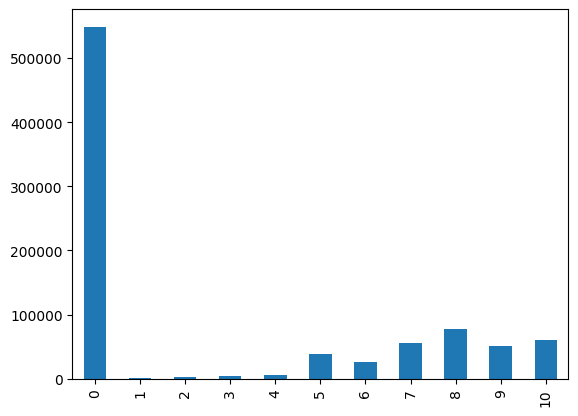

In [18]:
df['Book-Rating'].value_counts().sort_index().plot(kind='bar')

<Axes: >

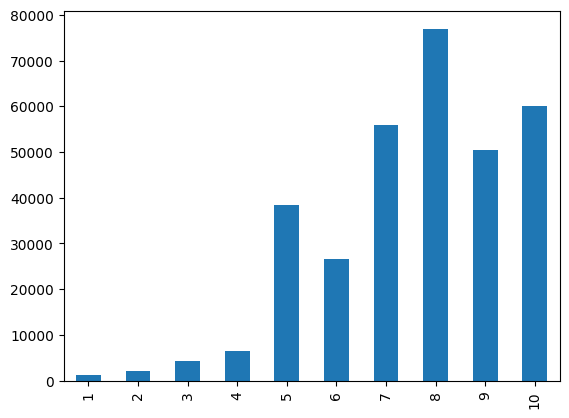

In [19]:
# 평점 있는 것만 확인
df['Book-Rating'].value_counts().sort_index()[1:].plot(kind='bar')

In [20]:
df['Book-Rating'].loc[df['Book-Rating']>0].describe()

count    322589.000000
mean          7.619085
std           1.847880
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Book-Rating, dtype: float64

In [21]:
zeropoint = df['Book-Rating'].loc[df['Book-Rating']==0].count()
validpoint = df['Book-Rating'].loc[df['Book-Rating']>0].count()
totalpoint = len(df['Book-Rating'])

print(f'Non-Rating : {round(zeropoint/totalpoint,2)}%\nRating : {round(validpoint/totalpoint,2)}%')

Non-Rating : 0.63%
Rating : 0.37%


### 4. Age

In [22]:
df.groupby('User-ID').mean()['Age'].describe()

<ipython-input-22-1eb13ea475c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('User-ID').mean()['Age'].describe()


count    83256.000000
mean        35.485455
std         11.357974
min          0.000000
25%         31.000000
50%         35.000000
75%         36.000000
max        244.000000
Name: Age, dtype: float64

In [23]:
sum(df.groupby('User-ID').mean()['Age'] >= 100)

<ipython-input-23-dadee255e697>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum(df.groupby('User-ID').mean()['Age'] >= 100)


117

In [24]:
sum(df.groupby('User-ID').mean()['Age'] < 1)

<ipython-input-24-796da9f27346>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum(df.groupby('User-ID').mean()['Age'] < 1)


115

In [25]:
sum(df.groupby('User-ID').mean()['Age'] < 8)

<ipython-input-25-6a0e5710a6f3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum(df.groupby('User-ID').mean()['Age'] < 8)


273

In [26]:
sum(df.groupby('User-ID').mean()['Age'] > 80)

<ipython-input-26-eb3a160f6eda>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum(df.groupby('User-ID').mean()['Age'] > 80)


181

<ipython-input-35-0f651ae989ae>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.hist(df.groupby('User-ID').mean()['Age'], bins=100)


(0.0, 100.0)

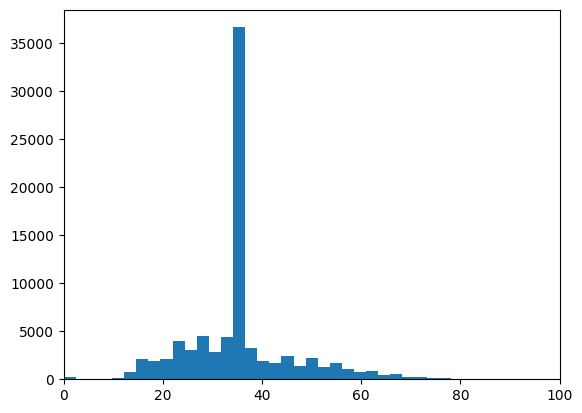

In [35]:
plt.hist(df.groupby('User-ID').mean()['Age'], bins=100)
plt.xlim(0,100)

- 8~80세로 범위 한정

## 4. Location

In [27]:
df.loc[6666]['Location']

'26655 westerstede, niedersachsen, lk ammerland, deutschland'

In [28]:
df[df['Location'].apply(lambda x: len(x.split(','))) != 3]

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
1962,TRAIN_001962,USER_00276,BOOK_139444,10,64.0,"endicott,ny, new york, usa","Friday Night Lights: A Town, a Team, and a Dream",H. G. Bissinger,1991.0,Perennial
6666,TRAIN_006666,USER_00725,BOOK_149102,0,35.0,"26655 westerstede, niedersachsen, lk ammerland...",Der Hahn ist tot. Roman.,Ingrid Noll,1993.0,Diogenes Verlag
7568,TRAIN_007568,USER_00911,BOOK_101484,10,29.0,"efland, nc 27243, north carolina, usa",The Ithon,Anonymous,2003.0,Infinity Publishing (PA)
7569,TRAIN_007569,USER_00911,BOOK_174611,5,29.0,"efland, nc 27243, north carolina, usa",A Big Storm Knocked It over: A Novel,Laurie Colwin,1993.0,Harpercollins
8239,TRAIN_008239,USER_01044,BOOK_084346,6,41.0,"tellico plains, tn, tennessee, usa",The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
...,...,...,...,...,...,...,...,...,...,...
870194,TRAIN_870194,USER_91906,BOOK_216059,0,35.0,"washington, d.c., district of columbia, usa",Educating Tigers,Wendy Sand Eckel,2000.0,Publishamerica
870195,TRAIN_870195,USER_91906,BOOK_233883,5,35.0,"washington, d.c., district of columbia, usa",Death Kit,Susan Sontag,1991.0,Anchor
870196,TRAIN_870196,USER_91906,BOOK_256804,1,35.0,"washington, d.c., district of columbia, usa",The Dive From Clausen's Pier (Alex Awards),ANN PACKER,2002.0,Knopf
870608,TRAIN_870608,USER_92040,BOOK_042883,0,48.0,"granger,, indiana, usa",Tuxedo Park : A Wall Street Tycoon and the Sec...,Jennet Conant,2002.0,Simon &amp; Schuster


In [29]:
# 국가 수준에서 볼 때, x, space와 같은 오류 데이터나, espana-spain과 같이 같은 국가를 뜻하는 단어들 포착
loc_ = df['Location'].apply(lambda x: x.split(',')[-1])
loc_.unique()

array([' canada', ' usa', ' germany', ' spain', ' australia',
       ' united kingdom', '', ' italy', ' netherlands', ' portugal',
       ' sweden', ' austria', ' france', ' finland', ' new zealand',
       ' singapore', ' switzerland', ' philippines', ' españa',
       ' malaysia', ' belgium', ' japan', ' denmark', ' belize',
       ' england', ' poland', ' ireland', ' haiti',
       ' trinidad and tobago', ' deutschland', ' tanzania', ' moldova',
       ' bulgaria', ' luxembourg', ' south africa', ' czech republic',
       ' israel', ' malta', ' petrolwar nation', ' kuwait', ' peru',
       ' ecuador', ' south korea', ' turkey', ' nigeria', ' brazil',
       ' hungary', ' indonesia', ' kazakhstan', ' india', ' china',
       ' egypt', ' croatia', ' taiwan', ' argentina', ' chile',
       ' venezuela', ' galiza', ' iceland', ' scotland', ' bolivia',
       ' lithuania', ' norway', ' mexico', ' bahamas', ' united sates',
       ' romania', ' iran', ' dominican republic', ' maricopa',
 

In [30]:
loc_ = df['Location'].apply(lambda x: x.split(',')[1])
loc_.unique()

array([' new brunswick', ' north carolina', ' minnesota', ...,
       ' shetland', ' wanganui', ' vaucluse'], dtype=object)

- 국가 단위에서 전처리 작업 수행
- Item2Vec 방법을 차용하여 지역 정보를 임베딩
  - 주소는 계층적이기에 나오는 단어쌍이 정해져 있을 것이라 가정

## 5. Book-Title

In [44]:
print(df['Book-Title'][22205])

Nacht Ã?Â¼ber den Wassern.


- 위와 같이 깨진 글자, 비영어 언어 존재
- 다른 부분에서 책에 대한 정보가 들어갈 것이라 판단하고 분석 대상에서 제외

## 6. Book-Author

In [47]:
df['Book-Author'].value_counts()

Stephen King           8467
Nora Roberts           6934
John Grisham           5283
James Patterson        5020
Mary Higgins Clark     3983
                       ... 
Cyrinda Foxe-Tyler        1
Matt Bloom                1
Cassie Kendall            1
Birney, M.D. Dibble       1
Stephen Griffith          1
Name: Book-Author, Length: 92635, dtype: int64

In [48]:
df['Book-Author'].value_counts().describe()

count    92635.000000
mean         9.406736
std         75.775138
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       8467.000000
Name: Book-Author, dtype: float64

## 7. year

In [50]:
df['Year-Of-Publication'].value_counts()

2002.0    77173
2001.0    67566
1999.0    64175
2000.0    61749
2003.0    60744
          ...  
2008.0        1
1909.0        1
1904.0        1
1378.0        1
1910.0        1
Name: Year-Of-Publication, Length: 110, dtype: int64

(array([1.15150e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 8.59875e+05]),
 array([-1.0000e+00,  2.0120e+02,  4.0340e+02,  6.0560e+02,  8.0780e+02,
         1.0100e+03,  1.2122e+03,  1.4144e+03,  1.6166e+03,  1.8188e+03,
         2.0210e+03]),
 <BarContainer object of 10 artists>)

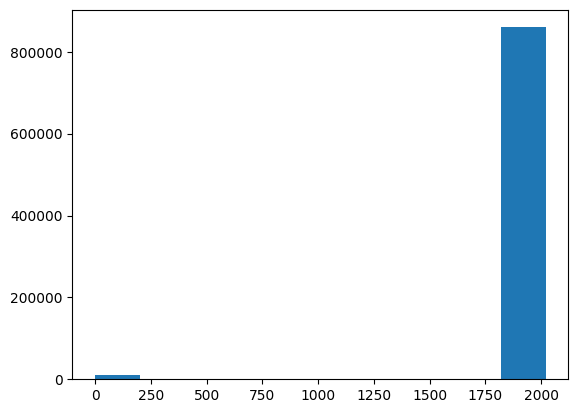

In [55]:
plt.hist(df['Year-Of-Publication'])

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 3.00000e+00, 1.80000e+01, 5.00000e+00, 2.50000e+01,
        2.00000e+00, 9.00000e+01, 5.70000e+01, 9.60000e+01, 2.20000e+01,
        4.80000e+01, 1.25000e+02, 9.40000e+01, 2.33000e+02, 9.17000e+02,
        1.11400e+03, 1.66400e+03, 1.82100e+03, 4.91900e+03, 1.01740e+04,
        2.79470e+04, 4.79820e+04, 8.13810e+04, 1.74505e+05, 2.17531e+05,
        2.67232e+05, 2.17990e+04, 1.20000e+01, 0.00000e+00, 5.90000e+01]),
 array([1806. , 1810.3, 1814.6, 1818.9, 1823.2, 1827.5, 1831.8, 1836.1,
        1840.4, 1844.7, 1849. , 1853.3, 1857.6, 1861.9, 1866.2, 1870.5,
        1874.8, 1879.1, 1883.4, 1887.7, 1892. , 1896.3, 1900.6, 1904.9,
        1909.2, 1913.5, 1917.8, 1922.1, 1926.4, 1930

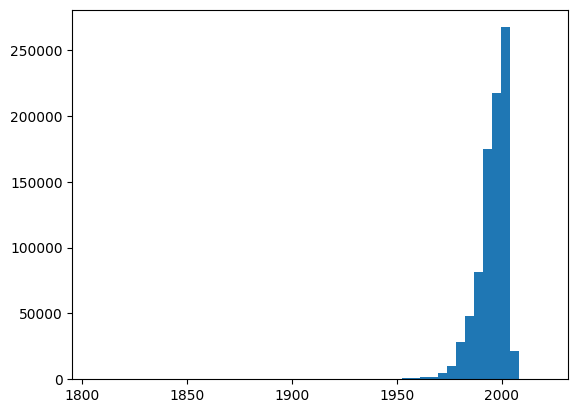

In [57]:
# 19세기부터
years = df.loc[df['Year-Of-Publication']>1801]
plt.hist(years['Year-Of-Publication'], bins=50)

(array([1.21000e+02, 6.90000e+01, 6.11000e+02, 1.78000e+02, 3.38000e+02,
        1.67000e+02, 4.37000e+02, 5.91000e+02, 2.48000e+02, 6.01000e+02,
        5.24000e+02, 6.50000e+02, 4.51000e+02, 7.20000e+02, 2.07900e+03,
        1.39800e+03, 3.26100e+03, 1.69500e+03, 3.32100e+03, 7.49800e+03,
        3.74800e+03, 1.12110e+04, 8.82900e+03, 2.20880e+04, 1.16650e+04,
        1.42290e+04, 3.39700e+04, 2.14770e+04, 5.38620e+04, 3.01810e+04,
        7.10510e+04, 4.53450e+04, 4.93730e+04, 1.03983e+05, 6.41750e+04,
        1.29315e+05, 7.71730e+04, 6.07440e+04, 2.17960e+04, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 1.10000e+01, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.90000e+01]),
 array([1950.  , 1951.42, 1952.84, 1954.26, 1955.68, 1957.1 , 1958.52,
        1959.94, 1961.36, 1962.78, 1964.2 , 1965.62, 1967.04, 1968.46,
        1969.88, 1971.3 , 1972.72, 1974.14, 1975.56, 1976.98, 1978.4 ,
        1979.82, 1981.24, 1982.66, 1984.08, 1985.5 , 19

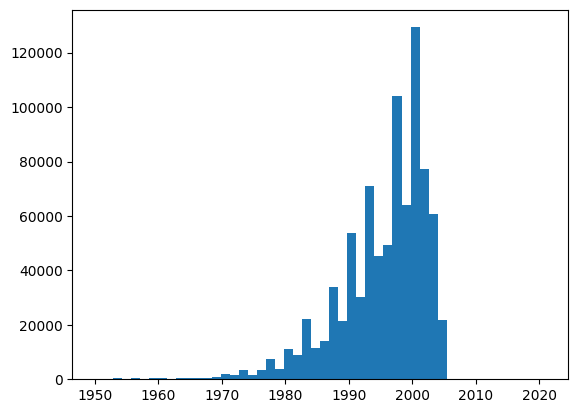

In [58]:
# 1950년부터
years = df.loc[df['Year-Of-Publication']>=1950]
plt.hist(years['Year-Of-Publication'], bins=50)

In [59]:
unknown = df.loc[df['Year-Of-Publication']==-1]
print(f"Unknown: {len(unknown)}")
under_1800 = df.loc[(df['Year-Of-Publication']>=0)&(df['Year-Of-Publication']<=1800)]
print(f"Under 1800: {len(under_1800)}")
century_19 = df.loc[(df['Year-Of-Publication']>1800)&(df['Year-Of-Publication']<=1900)]
print(f"19 century: {len(century_19)}")
century_20 = df.loc[(df['Year-Of-Publication']>1900)&(df['Year-Of-Publication']<=2000)]
print(f"20 century: {len(century_20)}")
for i in range(1900,2001,20):
  year1, year2 = i, i+20
  print(f"{year1}-{year2}: {len(century_20.loc[(century_20['Year-Of-Publication']>year1)&(century_20['Year-Of-Publication']<=year2)])}")
century_21 = df.loc[(df['Year-Of-Publication']>2000)&(df['Year-Of-Publication']<=2021)]
print(f"21 century: {len(century_21)}")

Unknown: 11515
Under 1800: 2
19 century: 4
20 century: 632519
1900-1920: 136
1920-1940: 275
1940-1960: 2435
1960-1980: 31294
1980-2000: 598379
2000-2020: 0
21 century: 227353


- 시대를 끊을 수 있는 마땅한 기준이 보이지 않음
- 다만, 시대가 가까워질수록 출판도서량이 많아지는 경향이 있음
- Unknown(-1) 부분은 중앙값으로 대체

## 8. Publisher

In [60]:
df['Publisher'].value_counts()

Ballantine Books                          29696
Pocket                                    27212
Berkley Publishing Group                  23647
Harlequin                                 21362
Warner Books                              21263
                                          ...  
Editorial y Distribuidora Leo                 1
Schoffling                                    1
Family Values Publishing, Incorporated        1
Slope Books                                   1
Sterling Publishing Co                        1
Name: Publisher, Length: 15505, dtype: int64

In [64]:
df['Publisher'].value_counts().describe()

count    15505.000000
mean        56.200774
std        659.732524
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max      29696.000000
Name: Publisher, dtype: float64

- 단순 인코딩 (여기서도 깨진 글자, 비영어 언어 등장)